In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
assets_df = pd.read_csv('../../../datasets/b3_dados/processed/acoes_concat.csv')
assets_normalized = pd.read_csv('../../../datasets/b3_dados/processed/selected_stocks_normalized.csv')

1. **Gráficos de Barras**\
\
Objetivo: Comparar valores agregados (como média, máximo ou mínimo) entre ações.

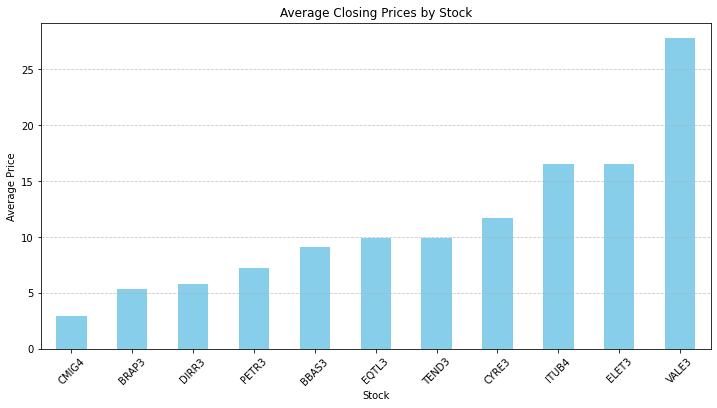

In [7]:

def plot_average_prices(data):
    avg_prices = data.iloc[:, 1:].mean()  # Calcula a média das ações (exclui a coluna de data)
    
    plt.figure(figsize=(12, 6))
    avg_prices.sort_values().plot(kind='bar', color='skyblue')
    plt.title('Average Closing Prices by Stock')
    plt.ylabel('Average Price')
    plt.xlabel('Stock')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Exemplo
plot_average_prices(assets_df)


2. **Gráficos de Linhas**\
\
Objetivo: Comparar preços ao longo do tempo para várias ações.

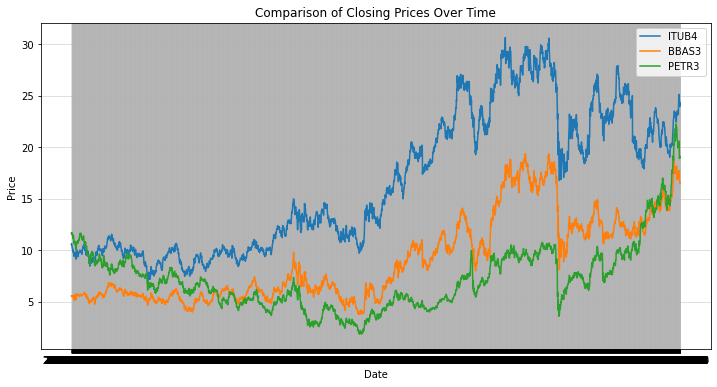

In [8]:
def plot_multiple_stocks(data, stocks):
    plt.figure(figsize=(12, 6))
    for stock in stocks:
        plt.plot(data['Date'], data[stock], label=stock)
    plt.title('Comparison of Closing Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(alpha=0.5)
    plt.show()

# Exemplo
plot_multiple_stocks(assets_df, ['ITUB4', 'BBAS3', 'PETR3'])


3. **Boxplots**\
\
Objetivo: Comparar a dispersão e os outliers dos preços de diferentes ações.

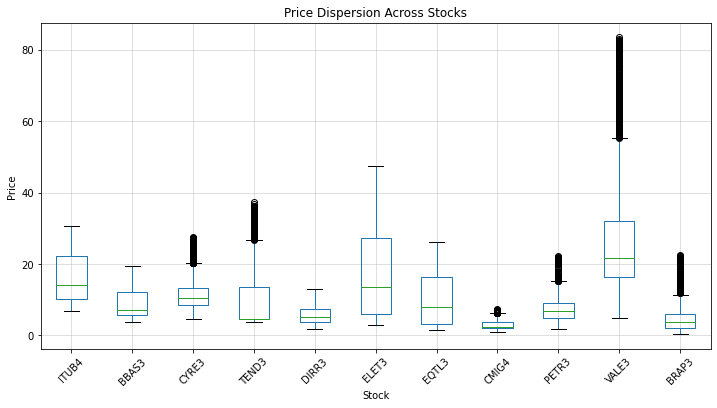

In [23]:
def plot_boxplot(data, title):
    plt.figure(figsize=(12, 6))
    if 'Date' in data.columns:
        data.iloc[:, 1:].boxplot()
    else:
        data.boxplot()
    plt.title(title)
    plt.ylabel('Price')
    plt.xlabel('Stock')
    plt.xticks(rotation=45)
    plt.grid(alpha=0.5)
    plt.show()

# Exemplo
plot_boxplot(assets_df,"Price Dispersion Across Stocks")


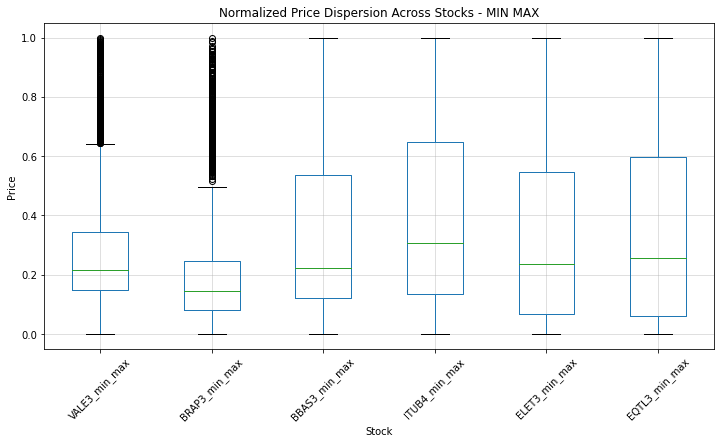

In [26]:
plot_boxplot(assets_normalized.filter(like='_min_max'), "Normalized Price Dispersion Across Stocks - MIN MAX")


4. **Heatmaps de Correlação**\
\
Objetivo: Comparar a correlação entre os preços das ações.

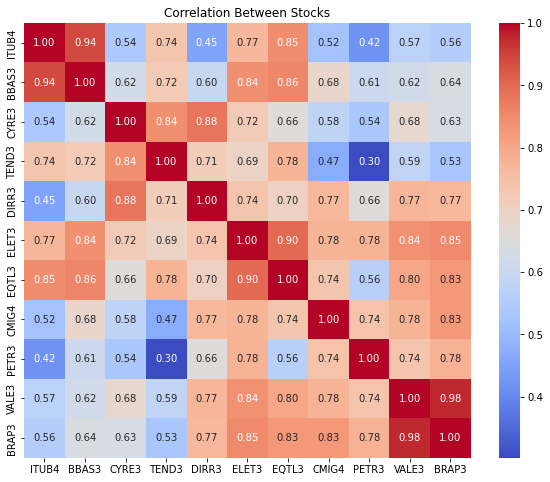

In [14]:
import seaborn as sns

def plot_correlation_matrix(data):
    correlation = data.iloc[:, 1:].corr()  # Calcula a correlação entre as ações
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title('Correlation Between Stocks')
    plt.show()

# Exemplo
plot_correlation_matrix(assets_df)
